## CS210 Term Project - A Visual Story of My Health and Well-being Goals

Narimene Belguidoum

## MOTIVATION : 


According to the World Health Organization, taking the equivalent of 10,000 steps daily is the minimum activity required to keep fit, maintain health and control weight. This everyday activity is not only essential to prevent the risk of developing certain serious conditions: cancer, diabetes... but it also improves our quality of life (better sleep quality, reduced stress) and this whatever the age. 

When you have a sedentary job, or are an engineering student, spending your days behind a computer, as is increasingly the case today, it is not always easy to take 10,000 steps a day. 

That is why, when I arrived in Turkey, I set myself the goal of taking my 10,000 steps a day. And in addition, nothing better than walking to discover all the corners of a new country. 

#### My exchange semester is coming to the end, so it’s time to take stock! 

To track my step count, I use the Health app, integrated directly into my iPhone. So, I had the idea to use my apple health data as analytical data for this project. And you will discover that we can analyze many other things, in addition to the number of steps, with the data of this application.   

## DATA SOURCES :

As I explained before, I decided to use my data from the health app of my iphone. For many iPhone owners, the Health app is now an indispensable multi-function tool. It is known for its primary function, counting the number of steps on a daily basis, but the Health app is full of many features. It is a very complete application, allowing to have a constant and global monitoring on our health. And above all, this app offers these users the possibility to export their own personal data. 

First, I used the "Export All Health Data" feature of my profile. This feature allows us to retrieve our data in the form of a ZIP file. Once un-zipped, we have a folder named "apple_health_export" which contains two files in XML format. The file that interests us and that contains my data this name "export.xml". 

Secondly, I tried to use the standard xml.etree.ElementTree library to browse and extract information from the XML file. However, after many attempts, this technique gave no results and I could not extract my data to exploit them. As I searched, I found a website (https://www.ericwolter.com/projects/apple-health-export/) that allowed me to directly convert my XML file to a CSV file, which would make it easier for me to use my data. 

So, I got my data in a CSV file named "HealthAutoExport-2022-09-01-2024-01-18 Data.csv".


## DATA ANALYSIS :

#### Loading and Display of the first lines

In the first step of data analysis, the CSV file containing the health application information was imported into the Python environment using the Pandas library. Using the read_csv() function, the data was loaded into a DataFrame. Then, to get an initial overview of the data, the first rows of the DataFrame were displayed using the head() method. This provides an initial understanding of the variables and their format. This initial step is crucial to start the exploration and preparation of the data that will follow.

In [74]:
import pandas as pd

# Load Data and Display the first lines
data = pd.read_csv('HealthAutoExport-2022-09-01-2024-01-18 Data.csv')
data.head()

,Date,Active Energy (kJ),Alcohol Consumption (count),Apple Exercise Time (min),Apple Sleeping Wrist Temperature (degC),Apple Stand Hour (count),Apple Stand Time (min),Basal Body Temperature (degC),Basal Energy Burned (kJ),Blood Alcohol Content (%),...,Waist Circumference (cm),Walking + Running Distance (km),Walking Asymmetry Percentage (%),Walking Double Support Percentage (%),Walking Heart Rate Average (count/min),Walking Speed (km/hr),Walking Step Length (cm),Weight & Body Mass (kg),Wheelchair Distance (km),Zinc (mg)
0,2022-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.190,NaN,NaN,NaN,3.60,54.00,NaN,NaN,
1,2022-09-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.540,0.0,27.97,NaN,4.93,68.12,NaN,NaN,
2,2022-09-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,2022-09-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,2022-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [75]:
# Column and data type info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Columns: 113 entries, Date to Zinc (mg) 
dtypes: float64(111), object(2)
memory usage: 445.9+ KB


#### Data Cleaning

In the data cleaning step, several crucial operations were performed on the DataFrame. Management of missing values was undertaken by identifying columns with missing values. So I decided to delete the columns where there was a lot of data missing. 


In [76]:
# Show list of columns
print(data.columns)

Index(['Date', 'Active Energy (kJ)', 'Alcohol Consumption (count)',
       'Apple Exercise Time (min)', 'Apple Sleeping Wrist Temperature (degC)',
       'Apple Stand Hour (count)', 'Apple Stand Time (min)',
       'Basal Body Temperature (degC)', 'Basal Energy Burned (kJ)',
       'Blood Alcohol Content (%)',
       ...
       'Waist Circumference (cm)', 'Walking + Running Distance (km)',
       'Walking Asymmetry Percentage (%)',
       'Walking Double Support Percentage (%)',
       'Walking Heart Rate Average (count/min)', 'Walking Speed (km/hr)',
       'Walking Step Length (cm)', 'Weight & Body Mass (kg)',
       'Wheelchair Distance (km)', 'Zinc (mg) '],
      dtype='object', length=113)


In [77]:
# Display the size of the DataFrame (number of rows, number of columns)
print(data.shape)

(505, 113)


In [78]:
# Obtain the number of missing values in each column
data.isnull().sum()

Date                                         0
Active Energy (kJ)                          15
Alcohol Consumption (count)                505
Apple Exercise Time (min)                  505
Apple Sleeping Wrist Temperature (degC)    505
                                          ... 
Walking Speed (km/hr)                       67
Walking Step Length (cm)                    67
Weight & Body Mass (kg)                    505
Wheelchair Distance (km)                   505
Zinc (mg)                                    0
Length: 113, dtype: int64

In [79]:
# Delete columns that are completely empty
data = data.dropna(axis=1, how='all')

# Display list of columns
print(data.columns)

Index(['Date', 'Active Energy (kJ)', 'Basal Energy Burned (kJ)',
       'Flights Climbed (count)', 'Headphone Audio Exposure (dBASPL)',
       'Step Count (count)', 'Walking + Running Distance (km)',
       'Walking Asymmetry Percentage (%)',
       'Walking Double Support Percentage (%)', 'Walking Speed (km/hr)',
       'Walking Step Length (cm)', 'Zinc (mg) '],
      dtype='object')


Now I proceed to a more precise filtering. Indeed, I try to evaluate the number of steps I have taken since my arrival in Turkey and compare it with the number of steps I took during the same period but last year. I therefore have to reduce my date interval to 2 different intervals: from "2022-09-25 - 2022-12-31" and from "2023-09-25 - 2023-12-31". 

In [80]:
# Convert the 'Date' column to date format
data['Date'] = pd.to_datetime(data['Date'])

# Set the two date intervals
interval1_start = '2022-09-25'
interval1_end = '2022-12-31'

interval2_start = '2023-09-25'
interval2_end = '2023-12-31'

# Select only the rows in the two specified date ranges
filtered_data = data.loc[((data['Date'] >= interval1_start) & (data['Date'] <= interval1_end)) |
                         ((data['Date'] >= interval2_start) & (data['Date'] <= interval2_end))]

# Display the resulting DataFrame size
print(filtered_data.shape)


(196, 12)


I also filter all the columns that I think are not useful in my data analysis.

In [81]:
# List of columns to keep
colonnes_a_garder = ['Date', 'Active Energy (kJ)', 'Basal Energy Burned (kJ)',
                     'Headphone Audio Exposure (dBASPL)', 'Step Count (count)',
                     'Walking + Running Distance (km)', 'Walking Speed (km/hr)',
                     'Walking Step Length (cm)']

# Use loc to select only specific columns
filtered_data = filtered_data.loc[:, colonnes_a_garder]

# Display list of columns
print(data.columns)

Index(['Date', 'Active Energy (kJ)', 'Basal Energy Burned (kJ)',
       'Flights Climbed (count)', 'Headphone Audio Exposure (dBASPL)',
       'Step Count (count)', 'Walking + Running Distance (km)',
       'Walking Asymmetry Percentage (%)',
       'Walking Double Support Percentage (%)', 'Walking Speed (km/hr)',
       'Walking Step Length (cm)', 'Zinc (mg) '],
      dtype='object')


#### Exploratory Data Analysis (EDA)

In [82]:
# Descriptive statistics
print(data.describe())

                      Date  Active Energy (kJ)  Basal Energy Burned (kJ)  \
count                  505          490.000000                490.000000   
mean   2023-05-11 00:00:00          681.759592               6137.987837   
min    2022-09-01 00:00:00            1.150000                 83.040000   
25%    2023-01-05 00:00:00          194.920000               6089.000000   
50%    2023-05-11 00:00:00          635.940000               6149.000000   
75%    2023-09-14 00:00:00         1033.750000               6200.000000   
max    2024-01-18 00:00:00         4120.000000               6559.000000   
std                    NaN          565.935964                315.045138   

       Flights Climbed (count)  Headphone Audio Exposure (dBASPL)  \
count               392.000000                         476.000000   
mean                 12.742347                          63.363214   
min                   1.000000                           0.000000   
25%                   4.750000         

In [83]:
# Display the total number of steps for each period
total_steps_interval1 = interval1_data['Step Count (count)'].sum()
total_steps_interval2 = interval2_data['Step Count (count)'].sum()

print(f"Total number of steps between {interval1_start} and {interval1_end}: {total_steps_interval1} steps")
print(f"Total number of steps between {interval2_start} and {interval2_end}: {total_steps_interval2} steps")


Total number of steps between 2022-09-25 and 2022-12-31: 585559.27 steps
Total number of steps between 2023-09-25 and 2023-12-31: 686175.0 steps


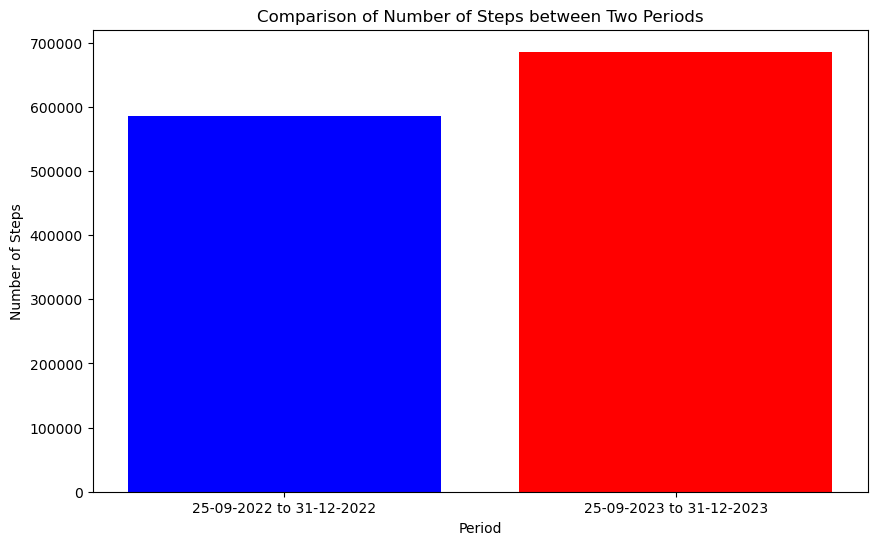

In [84]:
import matplotlib.pyplot as plt

# Create a bar graph to compare the number of steps
plt.figure(figsize=(10, 6))

plt.bar(['25-09-2022 to 31-12-2022', '25-09-2023 to 31-12-2023'],
        [total_pas_interval1, total_pas_interval2],
        color=['blue', 'red'])

plt.title('Comparison of Number of Steps between Two Periods')
plt.xlabel('Period')
plt.ylabel('Number of Steps')
plt.show()


I note that I took many more steps in Turkey during the selected period. Now, let’s look at the number of days I took the 10,000 steps I had set as my goal.

In [60]:
# Add a column to indicate if the threshold of 10,000 steps has been reached
interval1_data['Reached_10000_Steps'] = interval1_data['Step Count (count)'] > 10000
interval2_data['Reached_10000_Steps'] = interval2_data['Step Count (count)'] > 10000

# Calculate the total number of days the threshold was reached for each period
days_reached_interval1 = interval1_data['Reached_10000_Steps'].sum()
days_reached_interval2 = interval2_data['Reached_10000_Steps'].sum()

# View Results
print(f"Number of days with more than 10,000 steps between {interval1_start} and {interval1_end}: {days_reached_interval1} days")
print(f"Number of days with more than 10,000 steps between {interval2_start} and {interval2_end}: {days_reached_interval2} days")


Number of days with more than 10,000 steps between 2022-09-25 and 2022-12-31: 12 days
Number of days with more than 10,000 steps between 2023-09-25 and 2023-12-31: 16 days


I note that the difference is not that big. But good news, a Harvard Medical School study says 7,500 steps are enough. Let us now make a comparison based on this figure. 

In [85]:
# Add a column to indicate if the threshold of 10,000 steps has been reached
interval1_data['Reached_10000_Steps'] = interval1_data['Step Count (count)'] > 7500
interval2_data['Reached_10000_Steps'] = interval2_data['Step Count (count)'] > 7500

# Calculate the total number of days the threshold was reached for each period
days_reached_interval1 = interval1_data['Reached_10000_Steps'].sum()
days_reached_interval2 = interval2_data['Reached_10000_Steps'].sum()

# View Results
print(f"Number of days with more than 10,000 steps between {interval1_start} and {interval1_end}: {days_reached_interval1} days")
print(f"Number of days with more than 10,000 steps between {interval2_start} and {interval2_end}: {days_reached_interval2} days")


Number of days with more than 10,000 steps between 2022-09-25 and 2022-12-31: 27 days
Number of days with more than 10,000 steps between 2023-09-25 and 2023-12-31: 35 days


We can see that the number of days or the goal is reached augumenté and that there are more days of difference between the two periods.  

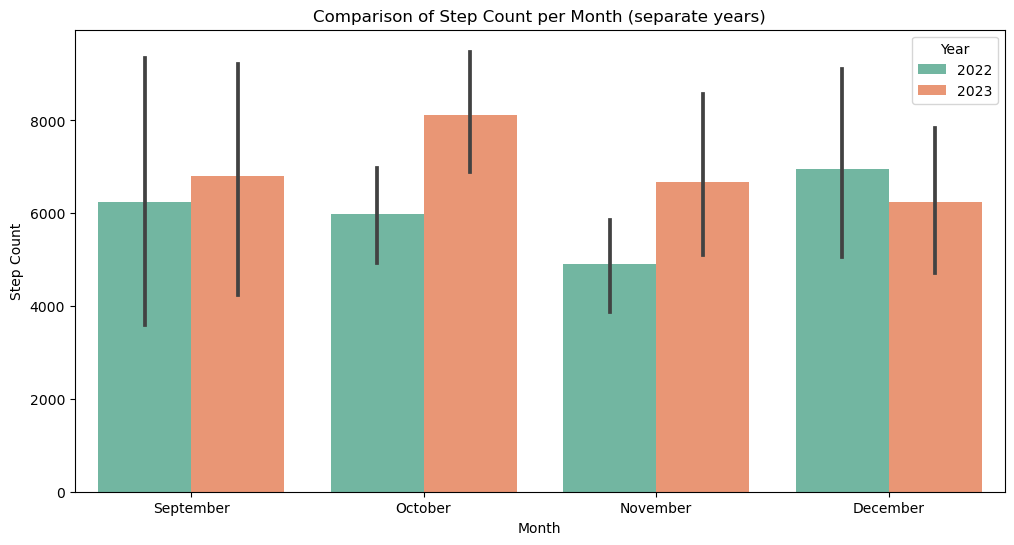

In [86]:
import calendar
import seaborn as sns

# Add a 'Month' column to extract the month from the date
filtered_data['Month'] = filtered_data['Date'].dt.month

# Mapping between month numbers and month names
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Apply the mapping to get month names
filtered_data['Month'] = filtered_data['Month'].map(month_mapping)

# Select the necessary columns
barplot_data = filtered_data[['Month', 'Step Count (count)']]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Step Count (count)', hue=filtered_data['Date'].dt.year, data=barplot_data, palette='Set2')

plt.title('Comparison of Step Count per Month (separate years)')
plt.xlabel('Month')
plt.ylabel('Step Count')
plt.legend(title='Year')
plt.show()


Looking at the monthly trends over the years, we see that the number of steps per month in 2023 is lower than in 2022 in December. Let us analyze more specifically why I did not walk bcp in December of this year. The following analysis is used to examine the exceptionally low days in terms of number of steps for the month of December 2023.

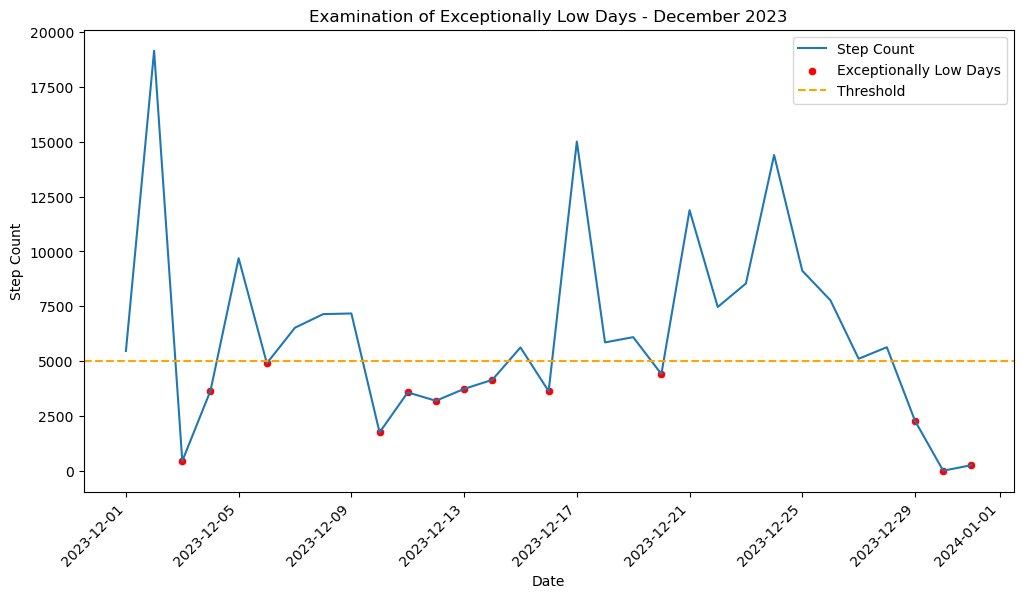

In [87]:
# Filter the data for December 2023
december_2023_data = filtered_data[(filtered_data['Date'].dt.year == 2023) & (filtered_data['Date'].dt.month == 12)]

# Define the threshold for exceptionally low days
low_threshold = 5000

# Identify exceptionally low days
exceptionally_low_days = december_2023_data[december_2023_data['Step Count (count)'] < low_threshold]

# Create a plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Step Count (count)', data=december_2023_data, label='Step Count')
sns.scatterplot(x='Date', y='Step Count (count)', data=exceptionally_low_days, color='red', label='Exceptionally Low Days')
plt.axhline(y=low_threshold, color='orange', linestyle='--', label='Threshold')

# Customize the plot
plt.title('Examination of Exceptionally Low Days - December 2023')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate dates for better readability

# Show the plot
plt.show()


In [65]:
# Display the list of exceptionally low days
print("List of exceptionally low days:\n", exceptionally_low_days[['Date', 'Step Count (count)']])

List of exceptionally low days:
           Date  Step Count (count)
458 2023-12-03               450.0
459 2023-12-04              3653.0
461 2023-12-06              4906.0
465 2023-12-10              1754.0
466 2023-12-11              3578.0
467 2023-12-12              3196.0
468 2023-12-13              3737.0
469 2023-12-14              4151.0
471 2023-12-16              3631.0
475 2023-12-20              4414.0
484 2023-12-29              2282.0
485 2023-12-30                 8.0
486 2023-12-31               262.0


These dates correspond to the days that preceded my midterms. During these days I stayed home to review what explains the little step made. 

/var/folders/87/y8vmh_jd18s92tbwbx9pd17c0000gn/T/ipykernel_54383/4215648916.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Day of Week', y='Step Count (count)', hue='Weekend', data=barplot_data, ci=None)


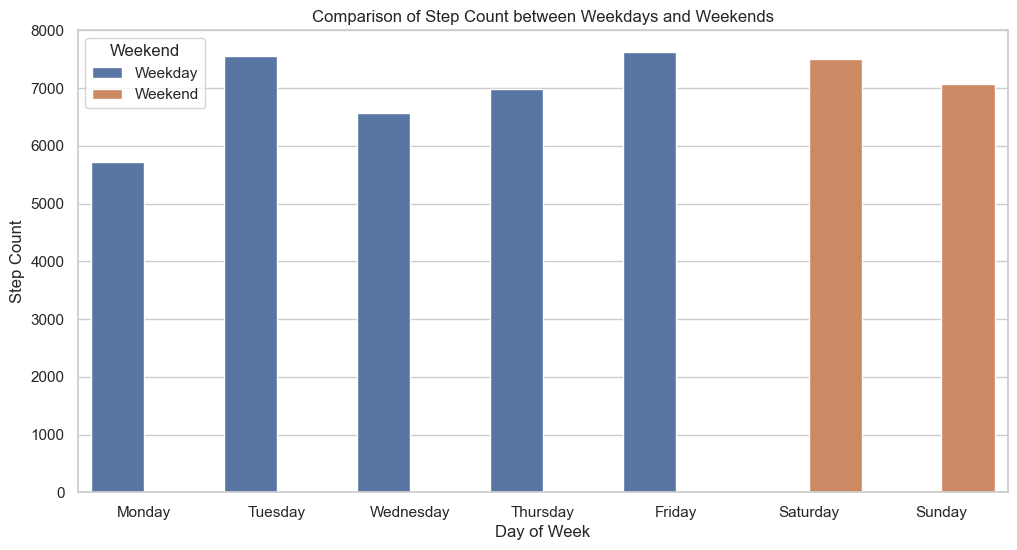

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a column 'Day of Week' to extract the day of the week from the date
data['Day of Week'] = data['Date'].dt.day_name()

# Add a column 'Weekend' to indicate whether it is a weekend or not
data['Weekend'] = data['Date'].dt.dayofweek.isin([5, 6])

# Select the necessary columns
barplot_data = data.loc[(data['Date'] >= '2023-09-25') & (data['Date'] <= '2023-12-31'), ['Day of Week', 'Step Count (count)', 'Weekend']]

# Create a new style of chart with a smaller size
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")  # Choose a grid style

# Use a categorical bar chart with the mean
sns.barplot(x='Day of Week', y='Step Count (count)', hue='Weekend', data=barplot_data, ci=None)

plt.title('Comparison of Step Count between Weekdays and Weekends')
plt.xlabel('Day of Week')
plt.ylabel('Step Count')
plt.legend(title='Weekend', labels=['Weekday', 'Weekend'])
plt.show()


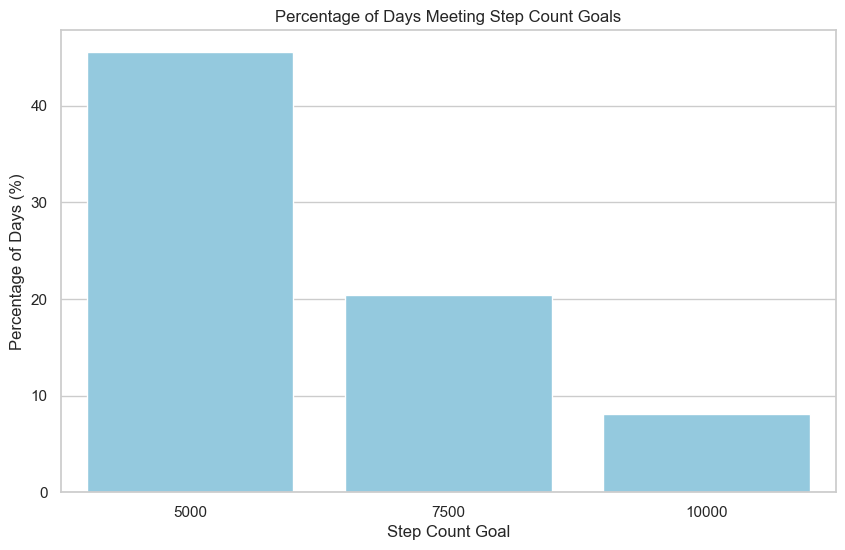

Percentage of days meeting or exceeding 5000 steps: 45.54%
Percentage of days meeting or exceeding 7500 steps: 20.40%
Percentage of days meeting or exceeding 10000 steps: 8.12%


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define different step count goals
step_goals = [5000, 7500, 10000]

# Add columns for each step count goal
for goal in step_goals:
    data[f'Met_Goal_{goal}'] = data['Step Count (count)'] >= goal

# Calculate the percentage of days meeting each goal
percentage_met_goals = data.loc[:, [f'Met_Goal_{goal}' for goal in step_goals]].mean() * 100

# Create a bar plot to visualize the percentage of days meeting each goal
plt.figure(figsize=(10, 6))
sns.barplot(x=step_goals, y=percentage_met_goals, color='skyblue')
plt.title('Percentage of Days Meeting Step Count Goals')
plt.xlabel('Step Count Goal')
plt.ylabel('Percentage of Days (%)')
plt.show()

# Display the percentages
for goal in step_goals:
    print(f"Percentage of days meeting or exceeding {goal} steps: {percentage_met_goals[f'Met_Goal_{goal}']:.2f}%")
